In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [473]:
df = pd.read_csv("SearchResults.csv")

In [474]:
df.drop("Rank", axis=1, inplace=True)

In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NCT Number               10000 non-null  object 
 1   Title                    10000 non-null  object 
 2   Acronym                  2619 non-null   object 
 3   Status                   10000 non-null  object 
 4   Study Results            10000 non-null  object 
 5   Conditions               10000 non-null  object 
 6   Interventions            9597 non-null   object 
 7   Outcome Measures         9540 non-null   object 
 8   Sponsor/Collaborators    10000 non-null  object 
 9   Gender                   9993 non-null   object 
 10  Age                      10000 non-null  object 
 11  Phases                   8838 non-null   object 
 12  Enrollment               9778 non-null   float64
 13  Funded Bys               10000 non-null  object 
 14  Study Type             

# Missing Data
- Handling Missing Data

In [476]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

<AxesSubplot:>

In [477]:
df.drop("Acronym", axis=1, inplace=True)

## Intervertentions
- we can use other data features to replace the missing values
- gender has Male, Female, All

In [478]:
gender = pd.get_dummies(df["Gender"], drop_first=True)

In [479]:
df = pd.concat([df, gender], axis=1)

In [480]:
sns.countplot(x = df["Gender"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

In [481]:
df.drop("Gender", axis=1, inplace=True)

## Study Doc
- Dropping missing too many values 

In [482]:
df.drop("Study Documents", axis=1, inplace=True)

In [483]:
df.drop("Results First Posted", axis=1, inplace=True)

In [484]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

<AxesSubplot:>

In [485]:
df["organization"] = df["Locations"].apply(lambda x : x.split(",")[0])

In [486]:
df["state"] = df["Locations"].apply(lambda x : x.split(",")[-2])

In [487]:
df.drop("Locations", axis=1, inplace=True)

## Drpping NA for the time being

In [488]:
df = df.dropna(axis=0)

In [489]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

<AxesSubplot:>

In [490]:
df["Status"].unique()

array(['Recruiting', 'Not yet recruiting', 'Enrolling by invitation',
       'Completed', 'Active, not recruiting', 'Terminated', 'Withdrawn',
       'Suspended', 'Unknown status'], dtype=object)

In [491]:
lisyFOrStatue = list(enumerate(df["Status"].unique()))

In [492]:
statusINdex = [x[0] for x in lisyFOrStatue]

In [493]:
status = [x[1] for x in lisyFOrStatue]

In [494]:
statusDict = dict(list(zip(status, statusINdex)))

In [495]:
df["Status"] = df["Status"].apply(lambda x: statusDict[x])

In [496]:
df["Study Results"].nunique()

2

In [497]:
df["Study Results"] = pd.get_dummies(df["Study Results"], drop_first=True)

## AGe

In [498]:
df["Age"] = df["Age"].apply(lambda x : x.split(",")[0].split("(")[0])

In [499]:
df["Age"].nunique()

543

In [500]:
df["Age"] = df["Age"].apply(lambda x : x.split("/")[0])

In [501]:
df["Age"].nunique()

543

In [502]:
listOFAges = list(enumerate(df["Age"].unique()))

In [503]:
ageIndex = [x[0] for x in listOFAges]

In [504]:
age = [x[1] for x in listOFAges]

In [505]:
zippyAge = dict(zip(age, ageIndex))

In [506]:
df["Age"] = df["Age"].apply(lambda x : zippyAge[x])

In [507]:
phases = pd.get_dummies(df["Phases"], drop_first=True)

In [508]:
df = pd.concat([df, phases], axis=1)

In [509]:
df.drop("Phases", axis=1, inplace=True)

In [510]:
df["Sponsor/Collaborators"].nunique()

2843

In [511]:
spoandcolab = list(enumerate(df["Sponsor/Collaborators"].unique()))

In [512]:
spoINdex = [x[0] for x in spoandcolab]

In [513]:
spo = [x[1] for x in spoandcolab]

In [514]:
spoDict = dict(zip(spo, spoINdex))

In [515]:
df["Sponsor/Collaborators"] = df["Sponsor/Collaborators"].apply(lambda x : spoDict[x])

In [516]:
df.columns

Index(['NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Age',
       'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs',
       'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Last Update Posted', 'URL', 'Female', 'Male',
       'organization', 'state', 'Not Applicable', 'Phase 1', 'Phase 1|Phase 2',
       'Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4'],
      dtype='object')

In [517]:
df.drop("Outcome Measures", axis = 1,  inplace=True)

In [518]:
df["Conditions"] = df["Conditions"].apply(lambda x : x.split("|")[0])

In [519]:
condList = list(enumerate(df["Conditions"].unique()))

In [520]:
condIndex = [x[0] for x in condList]

In [521]:
cond = [x[1] for x in condList]

In [522]:
conDict = dict(zip(cond, condIndex))

In [523]:
df["Conditions"] = df["Conditions"].apply(lambda x: conDict[x])

In [524]:
df["Interventions"] = df["Interventions"].apply(lambda x:x.split(":")[0])

In [525]:
df["Interventions"].nunique()

11

In [526]:
interventionList = list(enumerate(df["Interventions"].unique()))

In [527]:
interIndex = [x[0] for x in interventionList]

In [528]:
interv = [x[1] for x in interventionList]

In [529]:
interDict = dict(zip(interv, interIndex))

In [530]:
df["Interventions"] = df["Interventions"].apply(lambda x : interDict[x])

In [531]:
df.drop(["Title","NCT Number"], axis=1, inplace=True)

In [532]:
df["Funded Bys"].nunique()

29

In [533]:
fundedLit = list(enumerate(df["Funded Bys"].unique()))

In [534]:
fundedUndex = [x[0] for x in fundedLit]

In [535]:
funded = [x[1] for x in fundedLit]

In [536]:
fundedDict = dict(zip(funded, fundedUndex))

In [537]:
df["Funded Bys"] = df["Funded Bys"].apply(lambda x: fundedDict[x])

## Drop only one type

In [538]:
df["Study Type"]

1       Interventional
2       Interventional
3       Interventional
5       Interventional
7       Interventional
             ...      
9995    Interventional
9996    Interventional
9997    Interventional
9998    Interventional
9999    Interventional
Name: Study Type, Length: 8065, dtype: object

In [539]:
df["Study Type"].nunique()

1

In [540]:
df.drop("Study Type", axis=1, inplace=True)

In [541]:
df["Allocation"] = df["Study Designs"].apply(lambda x : x.split("|")[0].split(":")[1])

In [542]:
df["Allocation"].nunique()

11

In [543]:
alloList = list(enumerate(df["Allocation"].unique()))

In [544]:
alloIndex = [x[0] for x in alloList]

In [545]:
allo = [x[1] for x in alloList]

In [546]:
alloDict = dict(zip(allo, alloIndex))

In [547]:
df["Allocation"] = df["Allocation"].apply(lambda x: alloDict[x])

In [548]:
df.drop("Study Designs", axis=1, inplace=True)

In [549]:
df.drop("Other IDs", axis = 1, inplace=True)

In [550]:
df.columns

Index(['Status', 'Study Results', 'Conditions', 'Interventions',
       'Sponsor/Collaborators', 'Age', 'Enrollment', 'Funded Bys',
       'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Last Update Posted', 'URL', 'Female', 'Male',
       'organization', 'state', 'Not Applicable', 'Phase 1', 'Phase 1|Phase 2',
       'Phase 2', 'Phase 2|Phase 3', 'Phase 3', 'Phase 4', 'Allocation'],
      dtype='object')

## Dropping URL

In [341]:
df.drop("URL", axis=1, inplace=True)

## Dates

In [346]:
df["Start Date"] = pd.to_datetime(df["Start Date"])

In [349]:
df["Start day"] = [x.day for x in df["Start Date"]]

In [354]:
df["Start month"] = [x.month for x in df["Start Date"]]

In [355]:
df["Start year"] = [x.year for x in df["Start Date"]]

In [357]:
df.drop("Start Date", axis=1, inplace=True)

In [365]:
df["Primary Completion Date"] = pd.to_datetime(df["Primary Completion Date"])

In [366]:
df["Primary Completion Day"] = [x.day for x in df["Primary Completion Date"]]

In [367]:
df["Primary Completion month"] = [x.month for x in df["Primary Completion Date"]]

In [368]:
df["Primary Completion year"] = [x.year for x in df["Primary Completion Date"]]

In [369]:
df.drop("Primary Completion Date", axis=1, inplace=True)

In [371]:
df["Completion Date"] = pd.to_datetime(df["Completion Date"])

In [372]:
df["Completion Day"] = [x.day for x in df["Completion Date"]]

In [373]:
df["Completion Month"] = [x.month for x in df["Completion Date"]]

In [374]:
df["Completion year"] = [x.year for x in df["Completion Date"]]

In [375]:
df.drop("Completion Date", axis=1, inplace=True)

In [377]:
df["First Posted"] = pd.to_datetime(df["First Posted"])

In [378]:
df["First Posted Day"] = [x.day for x in df["First Posted"]]

In [379]:
df["First Posted Month"] = [x.month for x in df["First Posted"]]

In [380]:
df["First Posted year"] = [x.year for x in df["First Posted"]]

In [382]:
df.drop("First Posted", axis=1, inplace=True)

In [384]:
df["Last Update Posted"] = pd.to_datetime(df["Last Update Posted"])

In [386]:
df["Last Update Posted Day"] = [x.day for x in df["Last Update Posted"]]

In [387]:
df["Last Update Posted Month"] = [x.month for x in df["Last Update Posted"]]

In [388]:
df["Last Update Posted Year"] = [x.year for x in df["Last Update Posted"]]

In [389]:
df.drop("Last Update Posted", axis=1, inplace=True)

## Org and state

In [420]:
df["organization"].nunique()

3187

In [421]:
orgList = list(enumerate(df["organization"].unique()))

In [422]:
orgIndex = [x[0] for x in orgList]

In [423]:
org = [x[1] for x in orgList]

In [424]:
orgDict = dict(zip(org, orgIndex))

In [426]:
df["organization"] = df["organization"].apply(lambda x : orgDict[x])

In [427]:
statList = list(enumerate(df["state"].unique()))

In [428]:
stateIndex = [x[0] for x in statList]

In [429]:
state = [x[1] for x in statList]

In [430]:
stateDict = dict(zip(state, spoINdex))

In [432]:
df["state"] = df["state"].apply(lambda x: stateDict[x])

<AxesSubplot:>

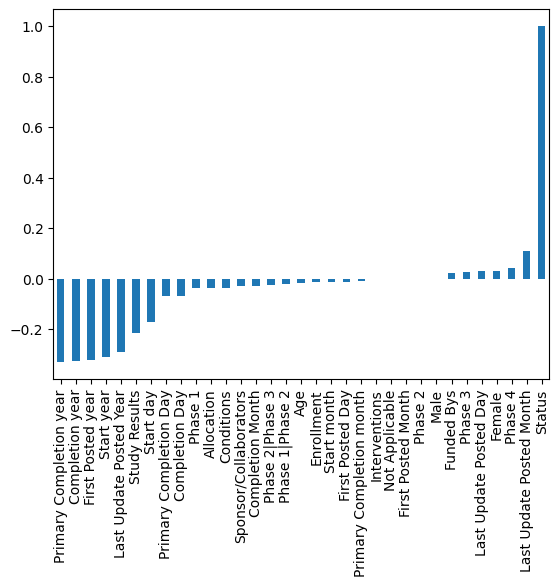

In [395]:
df.corrwith(df["Status"]).sort_values().plot(kind = "bar")

<AxesSubplot:>

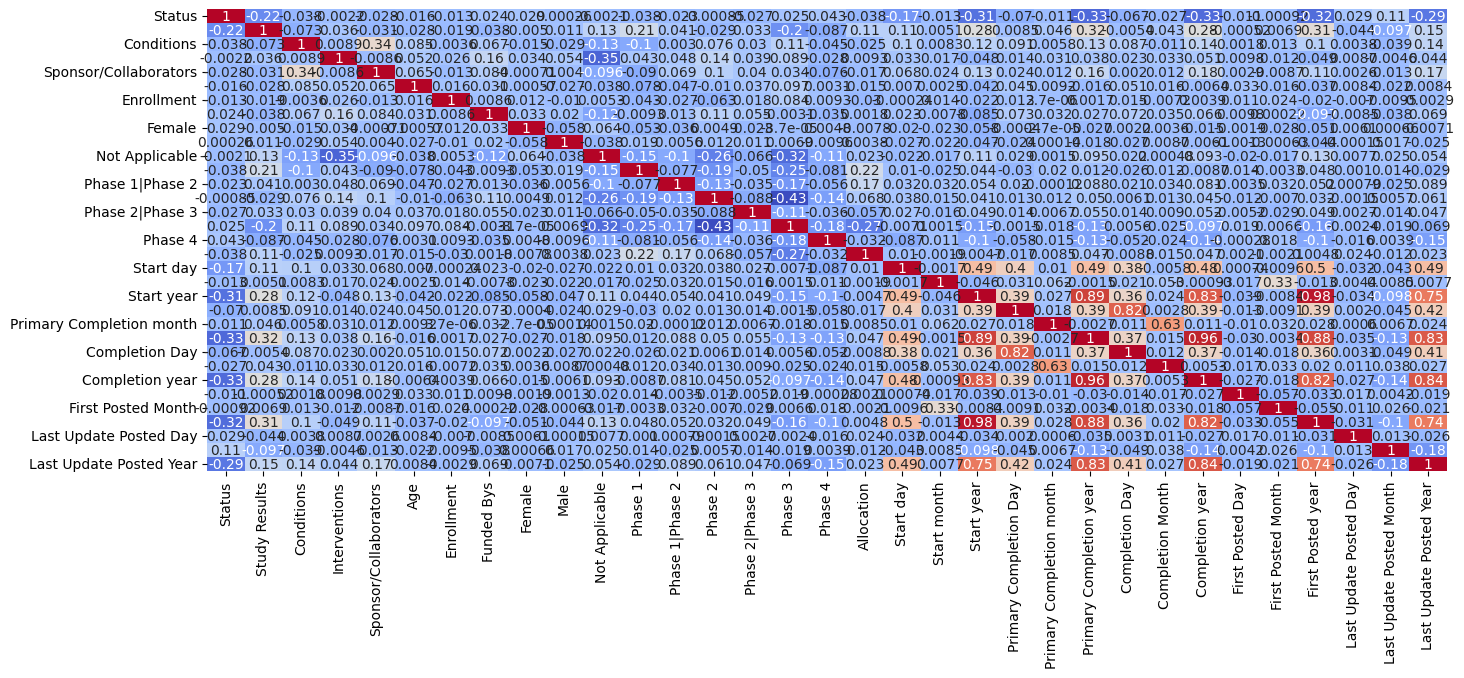

In [399]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True,cbar=False, cmap="coolwarm")

## Model Creation

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [459]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [460]:
X = df.drop("Status", axis=1).values
y = df["Status"].values

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [462]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [463]:
scalar = MinMaxScaler()

In [464]:
X_train = scalar.fit_transform(X_train)

In [465]:
X_test = scalar.transform(X_test)

In [466]:
X_train.shape

(5645, 34)

In [467]:
model = Sequential()
model.add(Dense(units=120, activation="relu"))
model.add(Dense(units=120, activation="relu"))

model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [468]:
from tensorflow.keras.callbacks import EarlyStopping

In [469]:
stop = EarlyStopping(patience=150)

In [470]:
model.fit(X_train, y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [stop] )

Train on 5645 samples, validate on 2420 samples
Epoch 1/600
5645/5645 [==============================] - 2s 322us/sample - loss: -898.1424 - accuracy: 0.0080 - val_loss: -4150.2905 - val_accuracy: 0.0058
Epoch 2/600
5645/5645 [==============================] - 1s 181us/sample - loss: -18757.2790 - accuracy: 0.0076 - val_loss: -42623.1877 - val_accuracy: 0.0058
Epoch 3/600
5645/5645 [==============================] - 1s 172us/sample - loss: -90556.7067 - accuracy: 0.0076 - val_loss: -152761.0098 - val_accuracy: 0.0058
Epoch 4/600
5645/5645 [==============================] - 1s 172us/sample - loss: -251158.6420 - accuracy: 0.0076 - val_loss: -366480.6544 - val_accuracy: 0.0058
Epoch 5/600
5645/5645 [==============================] - 1s 171us/sample - loss: -527951.4459 - accuracy: 0.0076 - val_loss: -707391.9622 - val_accuracy: 0.0058
Epoch 6/600
5645/5645 [==============================] - 1s 174us/sample - loss: -942614.8892 - accuracy: 0.0076 - val_loss: -1193594.2147 - val_accuracy: 

5645/5645 [==============================] - 1s 186us/sample - loss: -277725347.6110 - accuracy: 0.0076 - val_loss: -282169898.4727 - val_accuracy: 0.0058
Epoch 51/600
  32/5645 [..............................] - ETA: 1s - loss: -273229632.0000 - accuracy: 0.0000e+00WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


KeyboardInterrupt: 

Status  Study Results  Conditions  Interventions  Sponsor/Collaborators  \
1          0              1           0              0                      0   
2          1              1           1              1                      1   
3          0              1           2              1                      2   
5          1              1           3              2                      2   
7          1              1           4              3                      3   
...      ...            ...         ...            ...                    ...   
9995       4              1        2882              8                    399   
9996       3              0        2733              0                   2841   
9997       3              0          35              3                    358   
9998       3              1        2883              5                   2842   
9999       3              0        1256              5                    358   

      Age  Enrollment  Funded Bys  Female  Male  ...  Primary Completion year  \
1       0        36.0           0       0     0  ...                     2024   
2       1       420.0           1       0     0  ...                     2026   
3       2        32.0           0       0     0  ...                     2024   
5       3        12.0           0       0     0  ...                     2024   
7       0        40.0           2       0     0  ...                     2023   
...   ...         ...         ...     ...   ...  ...                      ...   
9995    6       300.0          14       0     0  ...                     2023   
9996   22      1028.0           2       0     0  ...                     2018   
9997  171        50.0           2       0     0  ...                     2016   
9998    3        50.0           2       0     0  ...                     2014   
9999    6       650.0           2       0     0  ...                     2016   

      Completion Day  Completion Month  Completion year  First Posted Day  \
1                  1                 9             2024                13   
2                 30                 8             2026                 8   
3                 31                 7             2024                 6   
5                  1                 8             2024                16   
7                  1                 4             2023                15   
...              ...               ...              ...               ...   
9995               2                10             2023                25   
9996              26                 3             2019                25   
9997               1                 3             2016                25   
9998               1                 2             2015                22   
9999               1                 6             2017                21   

      First Posted Month  First Posted year  Last Update Posted Day  \
1                      3               2023                      13   
2                      3               2023                       8   
3                      3               2023                       6   
5                      2               2023                      16   
7                      2               2023                      15   
...                  ...                ...                     ...   
9995                   8               2014                      10   
9996                   8               2014                      27   
9997                   8               2014                      27   
9998                   8               2014                      14   
9999                   8               2014                      30   

      Last Update Posted Month  Last Update Posted Year  
1                            3                     2023  
2                            3                     2023  
3                            3                     2023  
5                            2                    

In [554]:
df["URL"].iloc[1]

'https://ClinicalTrials.gov/show/NCT05760573'

In [644]:
#### import json
import requests

from bs4 import BeautifulSoup

URL = ("https://clinicaltrials.gov/ct2/show/record/NCT05768113?map_cntry=US&map_state=US%3ANJ&draw=2&rank=1")
oururl= requests.get(URL, "r")

In [645]:
oururl.text

'\r\n\r\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html xmlns="https://www.w3.org/1999/xhtml" lang=\'en\'>\n<head>  \n  <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n    <meta name="robots" content="noindex,nofollow"/>\n    <meta name="referrer" content="origin-when-cross-origin"/>\n  <title>LAEH Formulation Nasal Spray to Reduce Viral Load - Tabular View - ClinicalTrials.gov</title>\n    <link href="/ct2/show/record/NCT05768113" rel="canonical"/>\n    \n  <!-- Twitter Card data -->\n  <meta name="twitter:card" content="summary">\n  <meta name="twitter:image" content="https://clinicaltrials.gov/ct2/html/images/ct.gov-nlm-nih-square-logo.png?v1">\n\n  <!-- Open Graph data -->\n  <meta property="og:type" content="artic

In [566]:
## psss payload: 25 ount -> Page count 
payload = {"page": 3 , 'count': 25}

In [654]:
pd.read_html(oururl.text, match="tr")[0].iloc[36:]

Tracking Information  \
36           Eligibility Criteria   
37                     Sex/Gender   
38                           Ages   
39     Accepts Healthy Volunteers   
40                       Contacts   
41      Listed Location Countries   
42     Removed Location Countries   
43                            NaN   
44     Administrative Information   
45                     NCT Number   
46         Other Study ID Numbers   
47  Has Data Monitoring Committee   
48     U.S. FDA-regulated Product   
49          IPD Sharing Statement   
50      Current Responsible Party   
51     Original Responsible Party   
52          Current Study Sponsor   
53         Original Study Sponsor   
54                  Collaborators   
55                  Investigators   
56                    PRS Account   
57              Verification Date   

                               Tracking Information.1  
36  Inclusion Criteria:  Ability to provide writte...  
37                     Sexes Eligible for Study:  All  
38          18 Years to 65 Years (Adult, Older Adult)  
39                                                 No  
40  Contact information is only displayed when the...  
41                                      United States  
42                                                NaN  
43                                                NaN  
44                         Administrative Information  
45                                        NCT05768113  
46                                     SLV-CV19-SPRAY  
47                                       Not Provided  
48  Studies a U.S. FDA-regulated Drug Product: No ...  
49                             Plan to Share IPD:  No  
50                                 Salvacion USA Inc.  
51                                    Same as current  
52                                 Salvacion USA Inc.  
53                                    Same as current  
54                                       Not Provided  
55  Principal Investigator:  Jorge Amaya P Amaya, ...  
56                                 Salvacion USA Inc.  
57                                       January 2023